In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.integrate import odeint

In [2]:

plt.ion()

Vmax = 0.5
Vmax_lysogen = 0.1
K = 1
e = 5e-7
a = 1e-4#2e-7
l = 1e-1
i = 1e-4
B = 50
m = 1e-7
D = 1e-7

def monod(S, Ks):
    return S/(Ks+S)
# solve the system dy/dt = f(y, t)

def f(y, t):
    N = y[0]
    L = y[1]
    P = y[2]
    V = y[3]
    R = y[4]
    #total resources per bacterium
     #leave monod alone for birth
        #different resource pools
        #spatially dependent models
    dNdt = Vmax * monod(R,K)*N - a*N*(P+V) #natural death rate of bacteria, split into growth and death , see the derivation
    dLdt = Vmax_lysogen*monod(R,K)*L + a*P*N*l - i*L
    dPdt = B * (a*P*N*(1-l)+i*L) - a*(N+L)*P - m*P - D*P
    dVdt = B*a*V*N - a*(N+L)*V - D*V +m*P
    dRdt = -e*Vmax*monod(R,K)*(N+L)
    
    #at particular resources the bacteria start dying

    return [dNdt, dLdt, dPdt, dVdt, dRdt] #the things we want to integrate

In [8]:


y0 = [1, 0.1, 1, 100, 1]
t = np.linspace(1, 100, 10000)

soln = odeint(f, y0, t)




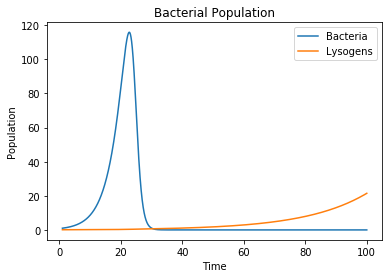

In [9]:

# plot results
plt.figure()
plt.plot(t, soln[:, 0], label='Bacteria')
plt.plot(t, soln[:, 1], label='Lysogens')

plt.xlabel('Time')
plt.ylabel('Population')
plt.title('Bacterial Population')
plt.legend(loc=0)

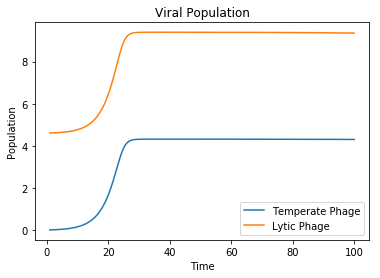

In [10]:
plt.plot(t, np.log(soln[:, 2]), label='Temperate Phage')
plt.plot(t, np.log(soln[:, 3]), label='Lytic Phage')

plt.xlabel('Time')
plt.ylabel('Population')
plt.title('Viral Population')
plt.legend(loc=0)

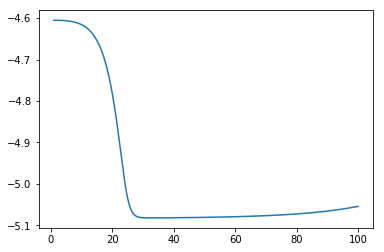

In [11]:
plt.plot(t, np.log(soln[:, 2]/soln[:,3]), label = 'Temperate:Lytic Ratio')
